# Query the API with a user token

- We show how to obtain and use a personal token for MMODA
- We show the logging level for messages

In order to access the full functionality of MMODA, it is recommended to authenticate to the service.
This will allow the user to receive emails at job completion and to enjoy role privileges like access to
private data or elaboration of many science windows (for collaborators of UNIGE).
Moreover, in case of unexpected issues, the developers will be able to easily track the issue and
communicate with the user.

The first step is obtaining a token.
First, you need to "Sign In" on the frontend. 
[https://www.astro.unige.ch/mmoda/](https://www.astro.unige.ch/mmoda/)

### Create account

If you do not have an account create one, by clicking always on Sign-in and, then, create new account.

<img src="Authentication_files/Login_ODA-new.png">

### login and get API code

* Once you login, you will find the "API token" button

<img src="Authentication_files/API_token.png">

* When you click on it, you will see a window in which the token can be copied on the clipboard or sent by email.

<img src="Authentication_files/token.png">

* Copy the token string and assign it to a variable called, e.g., 'token' as done in the following cell below interactively

* Note that the Token lives only 24 hours, so it needs to be regenerated if a longer time has passed since your login.


## Let's get some logging

This is to help visualizing the progress.

* WARNING is the default level
* INFO writes some more information
* DEBUG is maily for developers and issue tracking

In [1]:
import logging
#default
#logging.getLogger().setLevel(logging.WARNING)
#slightly more verbose
logging.getLogger().setLevel(logging.INFO)
#all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler()) 

In [2]:
import getpass
token = getpass.getpass('Insert the token')

Insert the token········


# Storing your token locally

The token can be stored in 

* an environment variable called `ODA_TOKEN`
* a file called `.oda-token` in current directory
* a file called `.oda-token` in your home diretory 

The function:
    ```token = oda_api.token.discover_token()```
will load the token in the variable ```token```

Note that a token expires so your local files will need to be updated regularly.

In [2]:
import oda_api.token 
token = oda_api.token.discover_token()

decoding token with jwt and NOT verifying
found token in file in home your token payload: {
    "email": "Carlo.Ferrigno@unige.ch",
    "exp": 1631786276,
    "name": "cferrigno",
    "roles": "authenticated user, administrator, content manager, general, integral-private-qla, magic, unige-hpc-full, public-pool-hpc, antares, sdss",
    "sub": "Carlo.Ferrigno@unige.ch"
}
token expires in 18.8 h


## This will let you know what is your token

In [3]:
oda_api.token.decode_oda_token(token)

decoding token with jwt and NOT verifying


{'sub': 'Carlo.Ferrigno@unige.ch',
 'email': 'Carlo.Ferrigno@unige.ch',
 'name': 'cferrigno',
 'roles': 'authenticated user, administrator, content manager, general, integral-private-qla, magic, unige-hpc-full, public-pool-hpc, antares, sdss',
 'exp': 1631786276}

# Example of SPI-ACS with token

- Note that at every request that needs a sufficiently long computation, you receive an email with a code suitable for the python API, also for submissions from the web front page

## Perform a query through API

You can make a query for SPI-ACS through the API and visualize the light curve as below.

Copy the API code in a cell (remove the coockie parameter if present).

Here, we have put the token value in a variable called token in a cell above.

In [4]:
from oda_api.api import DispatcherAPI

disp = DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data')
par_dict = {'src_name': '4U 1700-377', 
            'RA': '257.815417', 
            'DEC': '-41.593417', 
            'T1': '58195.455', 
            'T2': '58195.555', 
            'T_format': 'mjd', 
            'instrument': 'spi_acs', 
            'product_type': 'Real', 
            'product': 'spi_acs_lc', 
            'time_bin': '1', 
            'user_catalog_file': None,
           'token': token}

data_collection = disp.get_product(**par_dict)

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:879: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', None, 'selected_catalog', 'time_bin']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:879: UserWarning: 
----------------------------------------------------------------------------
the parameter: user_catalog_file   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', None, 'selected_catalog', 'time_bin']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote re

## Show data and plot

In [5]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 1.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [6]:
lc=data_collection._p_list[0]

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


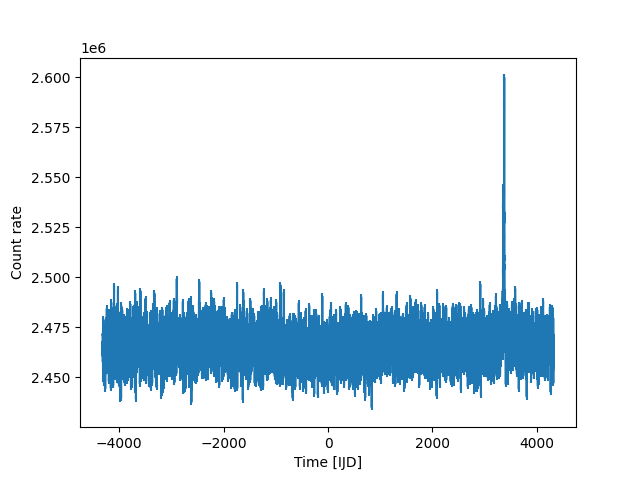

Text(0, 0.5, 'Count rate')

In [8]:
plt.errorbar(lc.data_unit[1].data['TIME'], lc.data_unit[1].data['RATE'], yerr=lc.data_unit[1].data['ERROR'])
plt.xlabel('Time [IJD]')
plt.ylabel('Count rate')

## Make another query

First look at the keys

In [11]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_spectrum')

--------------
parameters for product isgri_spectrum and instrument isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: token,  value: None,  units: str, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: integral_data_rights,  value: public,  units: str, 
 name: E1_keV,  value: 15.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum


### Extract an image on a limited number of pointigs
with the parameter max_pointings, we can get a random subset of available pointings
The most common use case is an image from which we want to derive the 
catalog of bright sources in the field of view

Note that we are giving the parameters as arguments.

In [12]:
image = disp.get_product(instrument="isgri", 
                     product="isgri_image", 
                     product_type="Real", 
                     osa_version='OSA11.1',
                     radius = 8,
                     RA=275.09142677,
                     DEC=7.18535523,
                     T1=58193.455,
                     T2=58246.892,
                     T_format= 'mjd',
                     max_pointings=10,
                     E1_keV=30.0,
                     E2_keV=80.0,
                     token=token
          )

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:879: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2021-09-15 17:13:19), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: VJPJGP7YCZKDCHVF job: 529a47088e06d0c7

... query status prepared => done
... assigned job id: 529a47088e06d0c7
query COMPLETED SUCCESSFULLY (state done)
query complete: terminating


In [13]:
#Let's look at the image
image.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": 0.0}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [14]:
#access it as an attribute
image.mosaic_image_0_mosaic

In [15]:
#Access it as liste memebr
data_collection._p_list[0]

In [16]:
#Minimum detection threshold and avoid including new sources
det_sigma = 8
include_new_sources = False

sources = image.dispatcher_catalog_1.table[image.dispatcher_catalog_1.table['significance'] >= det_sigma]

if len(sources) == 0:
    print('No sources in the catalog with det_sigma > %.1f' % det_sigma)
    

if not include_new_sources:
    ind = [not 'NEW' in ss for ss in sources['src_names']]
    clean_sources = sources[ind]
else:
    clean_sources = sources

#We copy back clean sources in the image data products
image.dispatcher_catalog_1.table = clean_sources

#We derive the catalog string for the spectrum !
api_cat_str=image.dispatcher_catalog_1.get_api_dictionary()

api_cat_str

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[17, 87], ["GRS 1915+105", "MAXI J1820+070"], [29.396455764770508, 1803.1607666015625], [288.799560546875, 275.0911865234375], [10.939922332763672, 7.185144901275635], [-32768, -32768], [2, 2], [0, 0], [0.0002800000074785203, 0.00041666667675599456]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U20"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

### Query a spectrum with the maximum number of available science windows

The maximum number of science windows that can be processed in a single query is 500, 
you should specify this in max_pointings. Otherwise the default value of 50 will be used.

Once the query is submitted, you will receive an email. You can now interrupt your query and wait for a second email when data will be ready.

In [18]:
#We get a spectrum from 50 pointings, note that maximum is 500 !
disp = DispatcherAPI(url='https://www.astro.unige.ch/mmoda/dispatch-data')
spectrum = disp.get_product(instrument="isgri", 
                 product="isgri_spectrum", 
                 product_type="Real", 
                 osa_version='OSA11.1',
                     RA="275.09142677",
                         DEC="7.18535523",
                    radius = "8",
                     T1="58193.455",
                     T2="58246.892",
                        T_format= 'mjd',
                     max_pointings="50",
                     token=token,
                 selected_catalog=api_cat_str)

- waiting for remote response (since 2021-09-15 17:14:14), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: UJEDDYSSCXQ7SJXJ job: 054e6e6055658cdf

... query status prepared => submitted
... assigned job id: 054e6e6055658cdf
 | the job is working remotely, please wait status=submitted job_id=054e6e60 in 0 messages since 10 seconds (11/11); in 0 SCW so far; nodes (0): 0 computed 0 restored
... 
- waiting for remote response (since 2021-09-15 17:14:26), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: UJEDDYSSCXQ7SJXJ job: 054e6e6055658cdf
 / the job is working remotely, please wait status=submitted job_id=054e6e60 in 1 messages since 23 seconds (11/12); in 0 SCW so far; nodes (1): 0 computed 1 restored
... ISGRISpectraSum : restored from cache : inapplicable
- waiting for remote response (since 2021-09-15 17:14:39), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: UJEDDYSSCXQ7SJXJ

In [19]:
#This is the source we inspect the spectrum for
src_name='MAXI J1820+070'

In [20]:
#We select a particulr source
data_sel=spectrum.new_from_metadata('src_name',src_name)
data_sel.show()

ID=0 prod_name=prod_0_MAXIJ1820p070_isgri_spectrum  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_spectrum'}

ID=1 prod_name=prod_1_MAXIJ1820p070_isgri_arf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_arf'}

ID=2 prod_name=prod_2_MAXIJ1820p070_isgri_rmf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_rmf'}



In [21]:
#We can save the files
data_sel.save_all_data()

In the folder where you run the notebook, you will have have the thre files
<pre>
prod_0_MAXIJ1820+070_isgri_spectrum.fits  prod_1_MAXIJ1820+070_isgri_arf.fits  prod_2_MAXIJ1820+070_isgri_rmf.fits
</pre>
that you can analyze with your preferred program.

## Let's extract a lightcurve with large bins

In [22]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_lc')

--------------
parameters for product isgri_lc and instrument isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: token,  value: None,  units: str, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: None,  units: str, 
 name: integral_data_rights,  value: public,  units: str, 
 name: E1_keV,  value: 15.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_lc_query
 product_name: isgri_lc
 name: time_bin,  value: 1000.0,  units: sec, 


In [23]:
#We get a light curve with 1000 s time bin and from 50 pointings (note that maximum is 500 !)
light_curve = disp.get_product(instrument="isgri", 
                 product="isgri_lc", 
                 product_type="Real", 
                 osa_version='OSA11.1',
                     RA=275.09142677,
                         DEC=7.18535523,
                    radius = 8,
                     T1=58193.455,
                         T2=58246.892,
                            E1_keV=30,
                            E2_keV=80,
                         T_format= 'mjd',
                     max_pointings=50,
                            time_bin=1000, #time bin in seconds
                     token=token,
                 selected_catalog=api_cat_str)

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:879: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'time_bin']
this will throw an error in a future version 
and might break the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2021-09-15 17:20:08), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
session: WG9DDGYZAVDOXN0C job: 649f965e66a6a092

... query status prepared => submitted
... assigned job id: 649f965e66a6a092
 / the job is working remotely, please wait status=submitted job_id=649f965e in 0 messages since 11 seconds (9.8/22); in 0 SCW so far; nodes (0): 0 computed 0 rest

In [24]:
#We look at which light curves are produced
light_curve.show()

ID=0 prod_name=isgri_lc_0_MAXIJ1820p070  meta_data: {'src_name': 'MAXI J1820+070', 'time_bin': 0.0115740651235683, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=1 prod_name=isgri_lc_1_GRS1915p105  meta_data: {'src_name': 'GRS 1915+105', 'time_bin': 0.0115740439999475, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [25]:
#We get the lightcurve that we care about (note that '+' is replaced by 'p' and '-' by 'm')
lc_maxi=light_curve.isgri_lc_0_MAXIJ1820p070

<IPython.core.display.Javascript object>


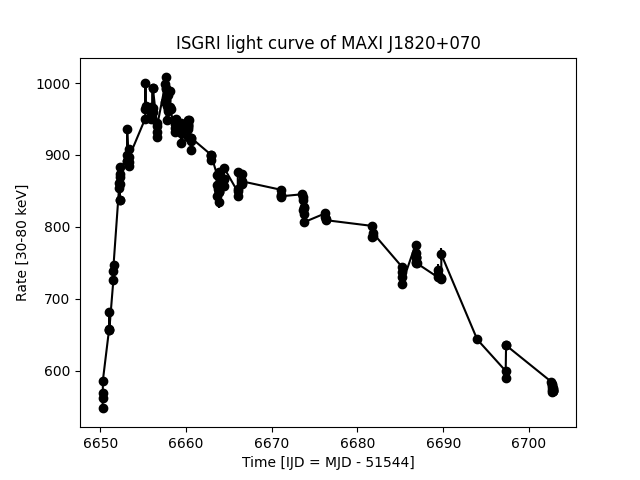

Text(0.5, 1.0, 'ISGRI light curve of MAXI J1820+070')

In [26]:
#We plot the light curve
import numpy as np
plt.figure()
t = lc_maxi.data_unit[1].data['TIME']
dt = lc_maxi.data_unit[1].data['XAX_E']
r = lc_maxi.data_unit[1].data['RATE']
dr = lc_maxi.data_unit[1].data['ERROR']

ind =  (r != 0) & (dr != 0)
t = t[ind]
r = r[ind]
dt = dt[ind]
dr = dr[ind]

title = '%s light curve of %s' %(lc_maxi.data_unit[1].header['DETNAM'], lc_maxi.data_unit[1].header['NAME'])
xlabel = 'Time [IJD = MJD - 51544]'
ylabel = 'Rate [%d-%d keV]' % (lc_maxi.data_unit[1].header['E_MIN'], lc_maxi.data_unit[1].header['E_MAX'])
plt.errorbar(t,r, xerr=dt, yerr=dr, marker='o', color='black', ecolor='black')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)